# The Battle of Neighborhoods W1
## Introduction
Tourism has always been a booming sector across the globe. No matter which country you live in, you can always come across a group of people, big or small, who always like to visit places. I being an adventurer myself can acknowledge this fact as to how tourism plays a salient role for a traveler/explorer. Tourism is not only an important aspect of a country’s economy but also for its global standing.

## Why Tourism is important to any country? -
The tourism industry is important for the benefits it brings and due to its role as a commercial activity that creates demand and growth for many more industries. Tourism not only contributes to more economic activities but also generates more employment, revenues, and play a significant role in development.

 + Tourism activity creates demand
 + Tourism industry value chain meets & spreads demand across industries & boosts more economic activities
 + Tourism induces more consumption

## Business Problem
All the benefits of tourism tend to reflect on the employment opportunity which it gives to the people of that country. The objective of this project is to analyze the tourist places of a given state in India and try to recommend the best location where they can open a restaurant or lodging to make the best use of the opportunity.

The target audience for this project include people who are interested in opening a restaurant, lodging, transport services or any other similar businesses which fall within the tourism industry

## Data Anatomization
To tackle the above mentioned problem, we need to have the dataset that contains

All the districts of a particular country
Latitude and longitudes of all the districts

## Source
The Wikipedia page https://en.wikipedia.org/wiki/List_of_districts_in_India is the major source of data that is being used to obtain all the districts of India. We then use beautifulsoup4 package, a Python module that helps to scrape information from the web pages to extract all the tables from this Wikipedia page and convert it into a pandas dataframe. Then we use Python’s geopy package to obtain the latitude and longitude of all the districts present in the dataframe.

## Description of the data -
The output shows the final dataset . The dataset consists of a single Dataframe with 9 columns containing state, districts, latitude and longitudes of the particular district etc. Other columns like code, headquarters, population, area and density have also been scraped from the website which can be used for further analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import csv
import json
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
from sklearn.cluster import KMeans
import folium
import math


In [23]:
states = pd.read_excel('C:\\Users\\tanay\\Downloads\\states.xlsx')

In [24]:
latlong = pd.read_csv('C:\\Users\\tanay\\Downloads\\archive\\district wise centroids.csv')

In [25]:
states.head()

,State,Code,District,Headquarters,Population,Area,Density
0,Andhra Pradesh,AN,Anantapur,Anantapur,4083315,19130,213
1,Andhra Pradesh,CH,Chittoor,Chittoor,4170468,15152,275
2,Andhra Pradesh,EG,East Godavari,Kakinada,5151549,10807,477
3,Andhra Pradesh,GU,Guntur,Guntur,4889230,11391,429
4,Andhra Pradesh,CU,Kadapa,Kadapa,2884524,15359,188


In [129]:
pip install foursquare

Note: you may need to restart the kernel to use updated packages.Successfully installed foursquare-1!2020.1.30



In [26]:
latlong.head()

,State,District,Latitude,Longitude
0,Andaman and Nicobar,Andaman Islands,12.382571,92.822911
1,Andaman and Nicobar,Nicobar Islands,7.835291,93.511601
2,Andhra Pradesh,Adilabad,19.284514,78.813212
3,Andhra Pradesh,Anantapur,14.312066,77.460158
4,Andhra Pradesh,Chittoor,13.331093,78.927639


In [27]:
pd.merge(states,latlong,left = ['District'], ['State'],right =['District'], how = 'inner')

SyntaxError: positional argument follows keyword argument (<ipython-input-27-d1635636a18b>, line 1)

In [28]:
df3=pd.merge(states,latlong, how='inner')

In [29]:
len(df3['State'].unique())

29

In [31]:
df3.loc[df3['State'] == 'Delhi']

,State,Code,District,Headquarters,Population,Area,Density,Latitude,Longitude
443,Delhi,CD,Central Delhi,Daryaganj,582320,25,27730,28.645944,77.128045
444,Delhi,ED,East Delhi,Preet Vihar,1709346,440,27132,28.628000,77.295600
445,Delhi,ND,New Delhi,Connaught Place,142004,22,4057,28.613900,77.209000
446,Delhi,NO,North Delhi,Sadar Bazaar,887978,59,14557,28.788600,77.141200
447,Delhi,NE,North East Delhi,Seelampur,2241624,52,36155,28.718400,77.258000
448,Delhi,NW,North West Delhi,Kanjhawala,3656539,130,8254,28.718600,77.068500
449,Delhi,SD,South Delhi,Saket,2731929,250,11060,28.481700,77.187300
450,Delhi,SW,South West Delhi,Vasant Vihar,2292958,395,5446,28.592900,77.034600
451,Delhi,WD,West Delhi,Rajouri Garden,2543243,112,19563,28.666300,77.068000


In [32]:
df3.isna().sum()

State           0
Code            3
District        0
Headquarters    0
Population      0
Area            0
Density         0
Latitude        0
Longitude       0
dtype: int64

In [33]:
df3.replace('NaN', np.nan, inplace=True)
df3 = df3.dropna()
print(len(df3))
df3.head()

449


,State,Code,District,Headquarters,Population,Area,Density,Latitude,Longitude
0,Andhra Pradesh,AN,Anantapur,Anantapur,4083315,19130.0,213,14.312066,77.460158
1,Andhra Pradesh,CH,Chittoor,Chittoor,4170468,15152.0,275,13.331093,78.927639
2,Andhra Pradesh,EG,East Godavari,Kakinada,5151549,10807.0,477,16.782718,82.243207
3,Andhra Pradesh,GU,Guntur,Guntur,4889230,11391.0,429,15.884926,80.586576
4,Andhra Pradesh,KR,Krishna,Vijayawada,4529009,8727.0,519,16.143873,81.148051


In [34]:
#Checking that all null values have been removed
df3.isnull().sum()

State           0
Code            0
District        0
Headquarters    0
Population      0
Area            0
Density         0
Latitude        0
Longitude       0
dtype: int64

In [36]:
state_pop_area = df3[['State', 'Population', 'Area']]

In [37]:
state_pop_area

,State,Population,Area
0,Andhra Pradesh,4083315,19130.0
1,Andhra Pradesh,4170468,15152.0
2,Andhra Pradesh,5151549,10807.0
3,Andhra Pradesh,4889230,11391.0
4,Andhra Pradesh,4529009,8727.0
...,...,...,...
447,Delhi,2241624,52.0
448,Delhi,3656539,130.0
449,Delhi,2731929,250.0
450,Delhi,2292958,395.0


In [38]:
state_pop_area.groupby(['State']).sum()

,Population,Area
State,,
Andaman and Nicobar,274984,4513.00
Andhra Pradesh,39240057,120609.00
Arunachal Pradesh,1361522,73667.00
Assam,23370658,61809.00
Bihar,92472298,81595.00
Chandigarh,1055450,114.00
Chhattisgarh,14844035,58751.00
Daman and Diu,191173,72.00
Delhi,16787941,1485.00


In [39]:
den_state = state_pop_area.groupby(['State'], as_index = False).sum()
den_state

,State,Population,Area
0,Andaman and Nicobar,274984,4513.00
1,Andhra Pradesh,39240057,120609.00
2,Arunachal Pradesh,1361522,73667.00
3,Assam,23370658,61809.00
4,Bihar,92472298,81595.00
5,Chandigarh,1055450,114.00
6,Chhattisgarh,14844035,58751.00
7,Daman and Diu,191173,72.00
8,Delhi,16787941,1485.00
9,Goa,1457723,3702.00


In [40]:
state_col = den_state.columns
state_col

Index(['State', 'Population', 'Area'], dtype='object')

<BarContainer object of 29 artists>

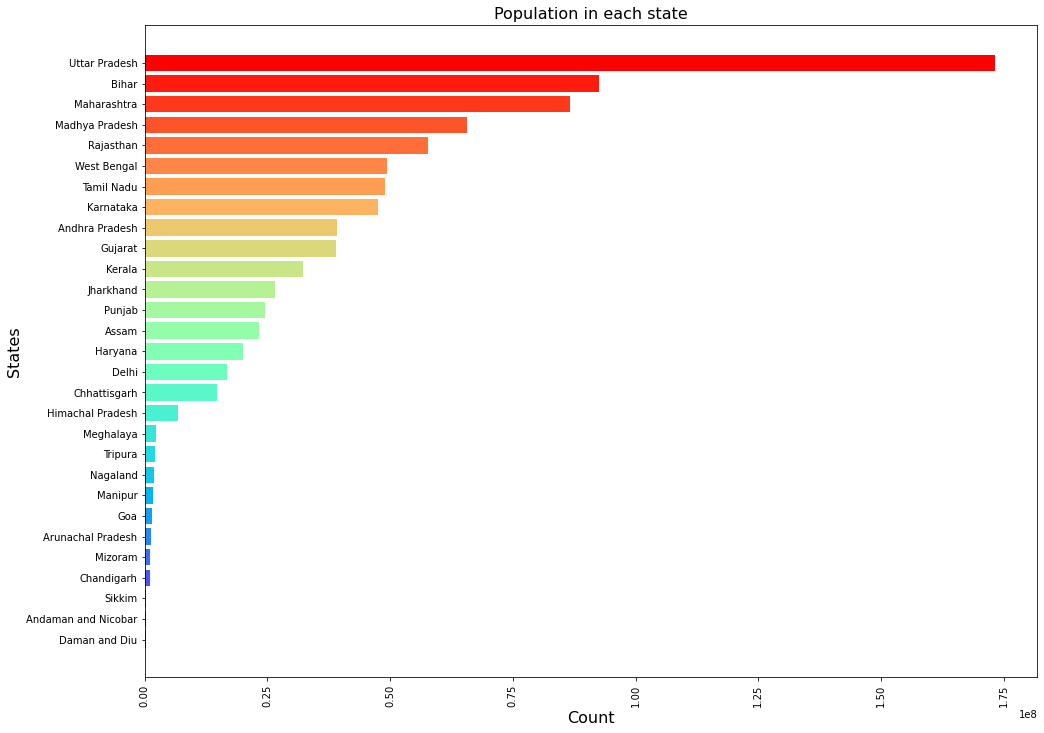

In [43]:
population = den_state['Population']
state = den_state['State']
den_state.sort_values('Population',inplace=True, ascending = False)


colors = cm.rainbow(np.linspace(0, 1, len(population.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("Count", fontsize = 16)
plt.ylabel("States", fontsize = 16)
plt.title("Population in each state", fontsize = 16)
plt.barh(state, population.values, color = colors)

In [44]:
print('The data has', len(den_state['State'].unique()), 'states')

The data has 29 states


## Entering a state of your choice

In [86]:
state = input('Enter a State - ')

Enter a State - Karnataka


## Retrieving the longitute and latitudes of the entered state

In [87]:
geolocator = Nominatim(user_agent=u"https://pypi.org/project/foursquare/")
location = geolocator.geocode(state)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of ' + state + ' are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Karnataka are 14.5203896, 75.7223521.


In [88]:
#dataframe containing only the state which is input by the user
df_user_state = df3[df3['State']==state].reset_index(drop=True)
df_user_state.head()

,State,Code,District,Headquarters,Population,Area,Density,Latitude,Longitude
0,Karnataka,BK,Bagalkot,Bagalkot,1890826,6583.0,288,16.158607,75.645261
1,Karnataka,BG,Belgaum,Belgaum,4778439,13415.0,356,16.161072,74.723290
2,Karnataka,BR,Bangalore Rural,Bangalore,987257,2239.0,441,12.936827,77.473693
3,Karnataka,BN,Bangalore Urban,Bangalore,9588910,2190.0,4378,12.901925,77.586856
4,Karnataka,BD,Bidar,Bidar,1700018,5448.0,312,17.950362,77.194600


In [89]:
#map of State using latitude and longitude values
map_state = folium.Map(location=[latitude, longitude], zoom_start=7)


# add markers to map
for lat, lng, st, district in zip(df_user_state['Latitude'], df_user_state['Longitude'], df_user_state['State'], df_user_state['District']):
    label = '{}, {}'.format(district, st)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_state)  
    
map_state

# Foursquare API

## Using credentials

In [90]:
#@hidden_cell

CLIENT_ID = 'LCFNUKQMOHZQEOTF12LKWF2BXZJNTBZW1UQFFBUFL2MHDZAZ' # your Foursquare ID
CLIENT_SECRET = '25BGLUKYU3WP14A3EM4WSAUGNVX5C0WLFJAHXZ4IRFWAEOFA' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LCFNUKQMOHZQEOTF12LKWF2BXZJNTBZW1UQFFBUFL2MHDZAZ
CLIENT_SECRET:25BGLUKYU3WP14A3EM4WSAUGNVX5C0WLFJAHXZ4IRFWAEOFA


In [91]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)

category_results = requests.get(url).json()
category_results

{'meta': {'code': 200, 'requestId': '60b4748073fd105d22dc5063'},
 'response': {'categories': [{'id': '4d4b7104d754a06370d81259',
    'name': 'Arts & Entertainment',
    'pluralName': 'Arts & Entertainment',
    'shortName': 'Arts & Entertainment',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'categories': [{'id': '56aa371be4b08b9a8d5734db',
      'name': 'Amphitheater',
      'pluralName': 'Amphitheaters',
      'shortName': 'Amphitheater',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4fceea171983d5d06c3e9823',
      'name': 'Aquarium',
      'pluralName': 'Aquariums',
      'shortName': 'Aquarium',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4bf58dd8d48988d1e1931735',
      'name': 'A

In [92]:
categories = len(category_results['response']['categories'])

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    print(venues)
    for j in range(len(category_results['response']['categories'][i]['categories'])):
        sub_venues = category_results['response']['categories'][i]['categories'][j]['name']
        print('\t\t' + sub_venues)

Arts & Entertainment
		Amphitheater
		Aquarium
		Arcade
		Art Gallery
		Bowling Alley
		Casino
		Circus
		Comedy Club
		Concert Hall
		Country Dance Club
		Disc Golf
		Escape Room
		Exhibit
		General Entertainment
		Go Kart Track
		Historic Site
		Karaoke Box
		Laser Tag
		Memorial Site
		Mini Golf
		Movie Theater
		Museum
		Music Venue
		Pachinko Parlor
		Performing Arts Venue
		Pool Hall
		Public Art
		Racecourse
		Racetrack
		Roller Rink
		Salsa Club
		Samba School
		Stadium
		Theme Park
		Tour Provider
		VR Cafe
		Water Park
		Zoo
College & University
		College Academic Building
		College Administrative Building
		College Auditorium
		College Bookstore
		College Cafeteria
		College Classroom
		College Gym
		College Lab
		College Library
		College Quad
		College Rec Center
		College Residence Hall
		College Stadium
		College Theater
		Community College
		Fraternity House
		General College & University
		Law School
		Medical School
		Sorority House
		Student Center
		Trade School
		U

In [93]:
all_categories = {}

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    all_categories[venues] = i

print(all_categories)

{'Arts & Entertainment': 0, 'College & University': 1, 'Event': 2, 'Food': 3, 'Nightlife Spot': 4, 'Outdoors & Recreation': 5, 'Professional & Other Places': 6, 'Residence': 7, 'Shop & Service': 8, 'Travel & Transport': 9}


In [94]:
tourist_category = []
business_category = []
req_categories = ['Arts & Entertainment', 'Nightlife Spot', 'Outdoors & Recreation']
req_categories2 = ['Food', 'Shop & Service', 'Travel & Transport']


for i in req_categories:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    tourist_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        tourist_category.append(sub_venues)

for i in req_categories2:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    business_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        business_category.append(sub_venues)

In [95]:
#remove unwanted categories from tourist list
tourist_category.remove('Lounge')
tourist_category.remove('Movie Theater')
tourist_category.remove('Bar')

#remove unwanted categories from business list
business_category.remove('Bus Station')
business_category.remove('ATM')
business_category.remove('Train Station')
business_category.remove('Bus Stop')
business_category.remove('Light Rail Station')
business_category.remove('Toll Booth')
business_category.remove('Toll Plaza')
business_category.remove('Tram Station')

In [96]:
LIMIT = 25

def getNearbyVenues_tourist(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    nearby_venues = nearby_venues[nearby_venues['Venue Category'].isin(tourist_category)]
    
    return(nearby_venues)

In [97]:
state_venues = getNearbyVenues_tourist(names=df_user_state['District'],
                                   latitudes=df_user_state['Latitude'],
                                   longitudes=df_user_state['Longitude']
                                  )

Bagalkot
Belgaum
Bangalore Rural
Bangalore Urban
Bidar
Bijapur
Chikmagalur
Chitradurga
Davanagere
Dharwad
Gadag
Gulbarga
Hassan
Haveri
Kodagu
Kolar
Koppal
Mandya
Mysore
Raichur
Shimoga
Udupi


In [98]:
print(state_venues.shape)
state_venues

(51, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
3,Bagalkot,16.158607,75.645261,Pattadakal Temple,15.950170,75.815833,Sculpture Garden
41,Bangalore Rural,12.936827,77.473693,Rangashankara,12.911472,77.586997,Performing Arts Venue
46,Bangalore Rural,12.936827,77.473693,Wonder La,12.835435,77.401427,Theme Park
48,Bangalore Rural,12.936827,77.473693,Cubbon Park,12.977042,77.595277,Park
54,Bangalore Urban,12.901925,77.586856,Rangashankara,12.911472,77.586997,Performing Arts Venue
71,Bangalore Urban,12.901925,77.586856,Play Arena,12.911591,77.676169,General Entertainment
85,Bijapur,16.840153,75.959092,Gol Gumbaz,16.827155,75.735692,Historic Site
89,Chikmagalur,13.425288,75.676265,Mullayanagiri,13.327518,75.771627,Trail
90,Chikmagalur,13.425288,75.676265,Channakeshwara Temple,13.163003,75.860839,Historic Site
92,Chikmagalur,13.425288,75.676265,Hoysaleshwara Temple,13.213539,75.994055,Historic Site


In [99]:
all_venues = state_venues['Venue'].tolist()
len(all_venues)

51

In [101]:
no_venues_in_district = state_venues.groupby('District', as_index=False).count()
no_venues_in_district = no_venues_in_district[['District','Venue']]
no_venues_in_district.rename(columns={'Venue':'No of Venues'}, inplace=True)
no_venues_in_district

,District,No of Venues
0,Bagalkot,1
1,Bangalore Rural,3
2,Bangalore Urban,2
3,Bijapur,1
4,Chikmagalur,4
5,Chitradurga,2
6,Hassan,4
7,Haveri,1
8,Kodagu,8
9,Kolar,4


In [102]:
max_no_of_venues = no_venues_in_district['No of Venues'].max()
max_no_of_venues

8

<BarContainer object of 15 artists>

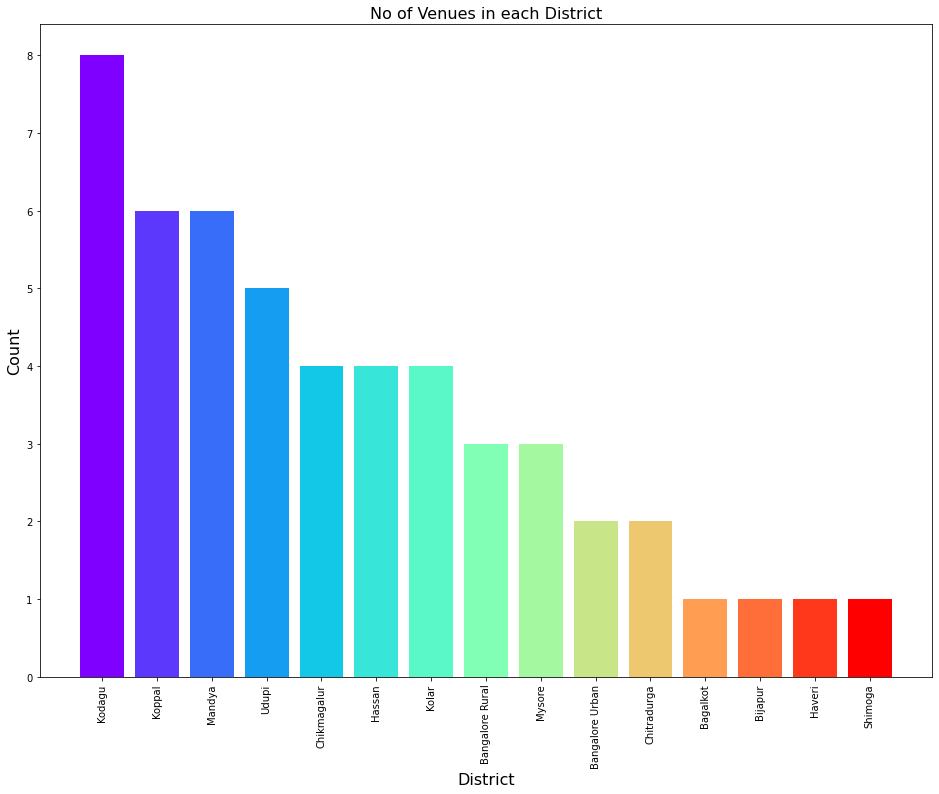

In [103]:
no_venues_in_district.sort_values('No of Venues', ascending=False, inplace=True)
venues = no_venues_in_district['No of Venues']
district = no_venues_in_district['District']


colors = cm.rainbow(np.linspace(0, 1, len(venues.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("District", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("No of Venues in each District", fontsize = 16)
plt.bar(district, venues.values, color = colors)

In [104]:
print('There are {} uniques categories.'.format(len(state_venues['Venue Category'].unique())))

There are 21 uniques categories.


In [105]:
#print unique venue categories
state_venues['Venue Category'].unique()

array(['Sculpture Garden', 'Performing Arts Venue', 'Theme Park', 'Park',
       'General Entertainment', 'Historic Site', 'Trail', 'Castle',
       'Scenic Lookout', 'Mountain', 'River', 'Farm', 'Brewery',
       'Other Great Outdoors', 'Exhibit', 'Palace', 'Zoo', 'Waterfall',
       'Garden', 'Island', 'Beach'], dtype=object)

In [106]:
# one hot encoding
state_venues_onehot = pd.get_dummies(state_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
state_venues_onehot['District'] = state_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [state_venues_onehot.columns[-1]] + list(state_venues_onehot.columns[:-1])
state_venues_onehot = state_venues_onehot[fixed_columns]

state_venues_onehot.head()

,District,Beach,Brewery,Castle,Exhibit,Farm,Garden,General Entertainment,Historic Site,Island,...,Palace,Park,Performing Arts Venue,River,Scenic Lookout,Sculpture Garden,Theme Park,Trail,Waterfall,Zoo
3,Bagalkot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
41,Bangalore Rural,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
46,Bangalore Rural,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48,Bangalore Rural,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
54,Bangalore Urban,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [107]:
state_venues_onehot.shape

(51, 22)

In [108]:
state_venues_grouped = state_venues_onehot.groupby('District').mean().reset_index()
state_venues_grouped

,District,Beach,Brewery,Castle,Exhibit,Farm,Garden,General Entertainment,Historic Site,Island,...,Palace,Park,Performing Arts Venue,River,Scenic Lookout,Sculpture Garden,Theme Park,Trail,Waterfall,Zoo
0,Bagalkot,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.000,0.0,...,0.000000,0.000000,0.000000,0.00,0.000000,1.0,0.000000,0.00,0.0,0.000000
1,Bangalore Rural,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.000,0.0,...,0.000000,0.333333,0.333333,0.00,0.000000,0.0,0.333333,0.00,0.0,0.000000
2,Bangalore Urban,0.0,0.0,0.0,0.000000,0.000,0.0,0.5,0.000,0.0,...,0.000000,0.000000,0.500000,0.00,0.000000,0.0,0.000000,0.00,0.0,0.000000
3,Bijapur,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,1.000,0.0,...,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.00,0.0,0.000000
4,Chikmagalur,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.750,0.0,...,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.25,0.0,0.000000
5,Chitradurga,0.0,0.0,0.5,0.000000,0.000,0.0,0.0,0.000,0.0,...,0.000000,0.000000,0.000000,0.00,0.500000,0.0,0.000000,0.00,0.0,0.000000
6,Hassan,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.750,0.0,...,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.00,0.0,0.000000
7,Haveri,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.000,0.0,...,0.000000,0.000000,0.000000,1.00,0.000000,0.0,0.000000,0.00,0.0,0.000000
8,Kodagu,0.0,0.0,0.0,0.000000,0.125,0.0,0.0,0.125,0.0,...,0.000000,0.000000,0.000000,0.25,0.375000,0.0,0.000000,0.00,0.0,0.000000
9,Kolar,0.0,0.5,0.0,0.000000,0.000,0.0,0.0,0.000,0.0,...,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.00,0.0,0.000000


In [109]:
num_top_venues = max_no_of_venues

for hood in state_venues_grouped['District']:
    print("----"+hood+"----")
    temp = state_venues_grouped[state_venues_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bagalkot----
              venue  freq
0  Sculpture Garden   1.0
1             Beach   0.0
2            Palace   0.0
3         Waterfall   0.0
4             Trail   0.0
5        Theme Park   0.0
6    Scenic Lookout   0.0
7             River   0.0


----Bangalore Rural----
                   venue  freq
0             Theme Park  0.33
1  Performing Arts Venue  0.33
2                   Park  0.33
3                  Beach  0.00
4                 Palace  0.00
5              Waterfall  0.00
6                  Trail  0.00
7       Sculpture Garden  0.00


----Bangalore Urban----
                   venue  freq
0  General Entertainment   0.5
1  Performing Arts Venue   0.5
2                  Beach   0.0
3                 Palace   0.0
4              Waterfall   0.0
5                  Trail   0.0
6             Theme Park   0.0
7       Sculpture Garden   0.0


----Bijapur----
              venue  freq
0     Historic Site   1.0
1             Beach   0.0
2            Palace   0.0
3         Waterfa

In [110]:
#function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [111]:
#create the new dataframe and display the top 10 venues for each district

num_top_venues = max_no_of_venues

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue Category'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = state_venues_grouped['District']

for ind in np.arange(state_venues_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(state_venues_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,District,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category
0,Bagalkot,Sculpture Garden,Zoo,Mountain,Brewery,Castle,Exhibit,Farm,Garden
1,Bangalore Rural,Theme Park,Performing Arts Venue,Park,Zoo,Island,Brewery,Castle,Exhibit
2,Bangalore Urban,Performing Arts Venue,General Entertainment,Zoo,Mountain,Brewery,Castle,Exhibit,Farm
3,Bijapur,Historic Site,Zoo,Mountain,Brewery,Castle,Exhibit,Farm,Garden
4,Chikmagalur,Historic Site,Trail,Zoo,Mountain,Brewery,Castle,Exhibit,Farm


In [112]:
venue_venue_category = state_venues.groupby(['District', 'Venue Category'], as_index=False).agg(lambda x: ", ".join(x))
venue_venue_category.head()

,District,Venue Category,Venue
0,Bagalkot,Sculpture Garden,Pattadakal Temple
1,Bangalore Rural,Park,Cubbon Park
2,Bangalore Rural,Performing Arts Venue,Rangashankara
3,Bangalore Rural,Theme Park,Wonder La
4,Bangalore Urban,General Entertainment,Play Arena


In [113]:
r, c = district_venues_sorted.shape

for rows in range(r):
    a = district_venues_sorted.iloc[rows, 0]
    for col, col_name in enumerate(district_venues_sorted.columns[1:]):
        b = district_venues_sorted.iloc[rows, col+1]
        pf = venue_venue_category[venue_venue_category['District'].str.contains(a) & venue_venue_category['Venue Category'].str.contains(b)]
        if not pf.empty:
            #print(b)
            idx = pf['Venue'].index.values.astype(int)[0]
            ven = pf['Venue'][idx]
            district_venues_sorted.iloc[rows, district_venues_sorted.columns.get_loc(col_name)] = ven
        elif pf.empty:
            district_venues_sorted.iloc[rows, district_venues_sorted.columns.get_loc(col_name)] = ''

In [114]:
indicators = ['st', 'nd', 'rd']
new = []

for ind in np.arange(max_no_of_venues):
    try:
        new.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        new.append('{}th Most Common Venue'.format(ind+1))

district_venues_sorted.columns = district_venues_sorted.columns[:1].tolist() + new

In [115]:
district_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Bagalkot,Pattadakal Temple,,,,,,,Pattadakal Temple
1,Bangalore Rural,Wonder La,Rangashankara,Cubbon Park,,,,,
2,Bangalore Urban,Rangashankara,Play Arena,,,,,,
3,Bijapur,Gol Gumbaz,,,,,,,
4,Chikmagalur,"Channakeshwara Temple, Hoysaleshwara Temple, H...",Mullayanagiri,,,,,,
5,Chitradurga,Chitradurga Fort,Pune-bangalore Highway,,,,,,
6,Hassan,"Channakeshwara Temple, Hoysaleshwara Temple, H...",Lord Bahubali Temple,,,,,,
7,Haveri,tungabhadra river,,,,,,,
8,Kodagu,"Madekeri Fort, Raja's seat, Abbey Falls","hanging bridge, Talacauvery","Somvarpet, SH-27",Kukke Subramanya Temple,Tadiyandmol peak,,,
9,Kolar,"Windmills Craftswork, Windmills Craftworks",Nandi Hills,nandi hills,,,,,


# Getting businesses which are nearby

In [116]:

LIMIT = 25

def getNearbyBusiness(names, latitudes, longitudes, radius=500):
    
    business_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby business
        business_list.append([(name,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_business = pd.DataFrame([item for business_list in business_list for item in business_list])
    nearby_business.columns = ['Venue',
                    'Business', 
                  'BLatitude', 
                  'BLongitude', 
                  'Business Category']
    
    nearby_business = nearby_business[nearby_business['Business Category'].isin(business_category)]
    
    return(nearby_business)

## Checking for nearby businesses

In [117]:
nearby_business = getNearbyBusiness(names=state_venues['Venue'],
                                   latitudes=state_venues['Venue Latitude'],
                                   longitudes=state_venues['Venue Longitude']
                                  )

Pattadakal Temple
Rangashankara
Wonder La
Cubbon Park
Rangashankara
Play Arena
Gol Gumbaz
Mullayanagiri
Channakeshwara Temple
Hoysaleshwara Temple
Halebeedu
Chitradurga Fort
Pune-bangalore Highway
Channakeshwara Temple
Hoysaleshwara Temple
Halebeedu
Lord Bahubali Temple
tungabhadra river
Madekeri Fort
Raja's seat
Kukke Subramanya Temple
Abbey Falls
hanging bridge
Somvarpet, SH-27
Tadiyandmol peak
Talacauvery
Windmills Craftswork
nandi hills
Windmills Craftworks
Nandi Hills
Hampi
Hanuman Temple
Lotus Mahal
Martanga Hill
Hemakuta Hill
Sasivekalu Ganesha
Tipu Sultan's Summer Palace
Dariya Daulat Bagh
Sri Chamarajendra Zoological Gardens - Mysore Zoo
Mysore Palace
Somanathapuram Temple
Mysore Zoo
Sri Chamarajendra Zoological Gardens - Mysore Zoo
Mysore Palace
Mysore Zoo
Jog Falls
Kmc Greens
St Mary's Island
End Point
Kaup Beach
Maravanthe Beach


In [118]:
print(nearby_business.shape)
nearby_business

(172, 5)


,Venue,Business,BLatitude,BLongitude,Business Category
4,Rangashankara,S N Refreshments,12.908372,77.587224,Snack Place
5,Rangashankara,Namma Kudla,12.912732,77.586128,Seafood Restaurant
8,Rangashankara,Chulha Chauki da Dhabha,12.912264,77.586055,Indian Restaurant
9,Rangashankara,Tasty Bites,12.913831,77.585760,Indian Restaurant
11,Rangashankara,KFC,12.911338,77.585754,Fast Food Restaurant
...,...,...,...,...,...
311,St Mary's Island,Ocean View,13.364036,74.698889,Seafood Restaurant
313,End Point,Planet Cafe,13.359316,74.784426,Sandwich Place
314,End Point,Country Inn & Suite,13.358450,74.785093,Hotel
316,End Point,La ShangriLa,13.360590,74.787610,Vegetarian / Vegan Restaurant


In [120]:
no_nearby_business = nearby_business.groupby('Business Category', as_index=False).count()
no_nearby_business = no_nearby_business[['Business Category','Business']]
no_nearby_business.rename(columns={'Business':'No of Businesses'}, inplace=True)
no_nearby_business

,Business Category,No of Businesses
0,Afghan Restaurant,1
1,Airport,1
2,Asian Restaurant,3
3,Bakery,4
4,Boat or Ferry,2
5,Breakfast Spot,2
6,Burger Joint,1
7,Café,20
8,Clothing Store,1
9,Coffee Shop,10


In [121]:
print('There are {} uniques categories.'.format(len(nearby_business['Business Category'].unique())))

There are 34 uniques categories.


In [122]:
# one hot encoding
nearby_business_onehot = pd.get_dummies(nearby_business[['Business Category']], prefix="", prefix_sep="")

# add venue column back to dataframe
nearby_business_onehot['Venue'] = nearby_business['Venue'] 

# move venue column to the first column
fixed_columns = [nearby_business_onehot.columns[-1]] + list(nearby_business_onehot.columns[:-1])
nearby_business_onehot = nearby_business_onehot[fixed_columns]

nearby_business_onehot.head()

,Venue,Afghan Restaurant,Airport,Asian Restaurant,Bakery,Boat or Ferry,Breakfast Spot,Burger Joint,Café,Clothing Store,...,Mediterranean Restaurant,Metro Station,Pizza Place,Restaurant,Sandwich Place,Seafood Restaurant,Smoke Shop,Snack Place,Tea Room,Vegetarian / Vegan Restaurant
4,Rangashankara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,Rangashankara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,Rangashankara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Rangashankara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Rangashankara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Group rows by venues and by taking the mean of the frequency of occurrence of each category

In [123]:
nearby_business_grouped = nearby_business_onehot.groupby('Venue').mean().reset_index()
nearby_business_grouped

,Venue,Afghan Restaurant,Airport,Asian Restaurant,Bakery,Boat or Ferry,Breakfast Spot,Burger Joint,Café,Clothing Store,...,Mediterranean Restaurant,Metro Station,Pizza Place,Restaurant,Sandwich Place,Seafood Restaurant,Smoke Shop,Snack Place,Tea Room,Vegetarian / Vegan Restaurant
0,Abbey Falls,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,Channakeshwara Temple,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.500000
2,Cubbon Park,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.5,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.0,0.000000
3,Dariya Daulat Bagh,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,End Point,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.0,0.250000
5,Gol Gumbaz,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,Halebeedu,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,Hampi,0.0,0.000000,0.0,0.111111,0.111111,0.000000,0.000000,0.111111,0.000000,...,0.000000,0.0,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,Hanuman Temple,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,Hemakuta Hill,0.0,0.000000,0.0,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [124]:
num_top_business = 5

for hood in nearby_business_grouped['Venue']:
    print("----"+hood+"----")
    temp = nearby_business_grouped[nearby_business_grouped['Venue'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_business))
    print('\n')

----Abbey Falls----
               venue  freq
0              Hotel   0.5
1  Indian Restaurant   0.5
2  Afghan Restaurant   0.0
3      Metro Station   0.0
4         Food Court   0.0


----Channakeshwara Temple----
                           venue  freq
0  Vegetarian / Vegan Restaurant   0.5
1              Indian Restaurant   0.5
2                  Metro Station   0.0
3                     Food Court   0.0
4                          Hotel   0.0


----Cubbon Park----
                  venue  freq
0         Metro Station  0.50
1  Fast Food Restaurant  0.25
2        Sandwich Place  0.25
3            Food Court  0.00
4                 Hotel  0.00


----Dariya Daulat Bagh----
               venue  freq
0  Indian Restaurant   0.5
1         Restaurant   0.5
2  Afghan Restaurant   0.0
3      Metro Station   0.0
4         Food Court   0.0


----End Point----
                           venue  freq
0  Vegetarian / Vegan Restaurant  0.25
1                          Hotel  0.25
2                 Sand

In [125]:
#function to sort the business in descending order

def return_most_common_business(row, num_top_business):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_business]

In [126]:
num_top_business = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top business
columns = ['Venue']
for ind in np.arange(num_top_business):
    try:
        columns.append('{}{} Most Common Business'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Business'.format(ind+1))

# create a new dataframe
nearby_business_sorted = pd.DataFrame(columns=columns)
nearby_business_sorted['Venue'] = nearby_business_grouped['Venue']

for ind in np.arange(nearby_business_grouped.shape[0]):
    nearby_business_sorted.iloc[ind, 1:] = return_most_common_business(nearby_business_grouped.iloc[ind, :], num_top_business)

nearby_business_sorted.head()

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
0,Abbey Falls,Hotel,Indian Restaurant,Vegetarian / Vegan Restaurant,Eastern European Restaurant,Diner,Department Store,Convenience Store,Comfort Food Restaurant,Coffee Shop,Clothing Store
1,Channakeshwara Temple,Vegetarian / Vegan Restaurant,Indian Restaurant,Clothing Store,Diner,Department Store,Convenience Store,Comfort Food Restaurant,Coffee Shop,Café,Eastern European Restaurant
2,Cubbon Park,Metro Station,Fast Food Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,Café,Department Store,Convenience Store,Comfort Food Restaurant,Coffee Shop,Clothing Store
3,Dariya Daulat Bagh,Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Clothing Store,Diner,Department Store,Convenience Store,Comfort Food Restaurant,Coffee Shop,Café
4,End Point,Vegetarian / Vegan Restaurant,Convenience Store,Sandwich Place,Hotel,Clothing Store,Diner,Department Store,Comfort Food Restaurant,Coffee Shop,Café


# Performing cluster analysis

## Finding the optimal K value using elbow method

In [127]:
sse = {}
for k in range(1,50):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(nearby_business_grouped.drop('Venue',axis=1))
    nearby_business_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

<ipython-input-127-384964eaffd2>:4: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (27). Possibly due to duplicate points in X.
  kmeans.fit(nearby_business_grouped.drop('Venue',axis=1))
<ipython-input-127-384964eaffd2>:4: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (28). Possibly due to duplicate points in X.
  kmeans.fit(nearby_business_grouped.drop('Venue',axis=1))
<ipython-input-127-384964eaffd2>:4: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (29). Possibly due to duplicate points in X.
  kmeans.fit(nearby_business_grouped.drop('Venue',axis=1))
<ipython-input-127-384964eaffd2>:4: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  kmeans.fit(nearby_business_grouped.drop('Venue',axis=1))
<ipython-input-127-384964eaffd2>:4: ConvergenceWarning: Number of distinct clusters (26) found smaller than 

ValueError: n_samples=31 should be >= n_clusters=32.

In [ ]:
#Run k-means to cluster the neighborhood into 5 clusters

# set number of clusters
kclusters = 3

nearby_business_grouped_clustering = nearby_business_grouped.drop('Venue', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nearby_business_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

In [ ]:
#create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

# add clustering labels
nearby_business_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nearby_business_merged = nearby_business[['Venue']]
new_state_venues = state_venues[['Venue', 'Venue Latitude', 'Venue Longitude']]

nearby_business_merged = nearby_business_merged.join(new_state_venues.set_index('Venue'), on='Venue')

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nearby_business_merged = nearby_business_merged.join(nearby_business_sorted.set_index('Venue'), on='Venue')

nearby_business_merged.drop_duplicates(subset='Venue', keep='first', inplace=True)
nearby_business_merged

# Cluster visualization

In [ ]:
#visualize the resulting clusters

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_business_merged['Venue Latitude'], nearby_business_merged['Venue Longitude'], nearby_business_merged['Venue'], nearby_business_merged['Cluster Labels']):
    if not math.isnan(cluster):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[int(cluster)],
            fill=True,
            fill_color=rainbow[int(cluster)],
            fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Cluster examination

### Cluster 1

In [ ]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 0, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

### Cluster 2

In [ ]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 1, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

### Cluster 3

In [ ]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 2, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]